# XGBRegression Test

Trying out the XBGRegression model and testing it on the FD001 dataset with running summary features

In [3]:
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import xgboost as xgb
import pandas as pd

In [8]:
X_train = pd.read_csv('../data/processed/processed_train_FD001.txt',sep=',')
y_train = pd.read_csv('../data/processed/process_target_train_FD001.txt',sep=',')['RUL']
X_test = pd.read_csv('../data/processed/processed_test_FD001.txt',sep=',')
y_test = pd.read_csv('../data/external/RUL_FD001.txt',sep=',')

In [10]:
xgb0 = xgb.XGBRegressor()
xgb0.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [14]:
expected_y = y_train
predicted_y = xgb0.predict(X_train)
predicted_y[predicted_y < 0] = 0

0.9907783556726087
0.02148428805648309


c:\Users\steve\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RUL'>

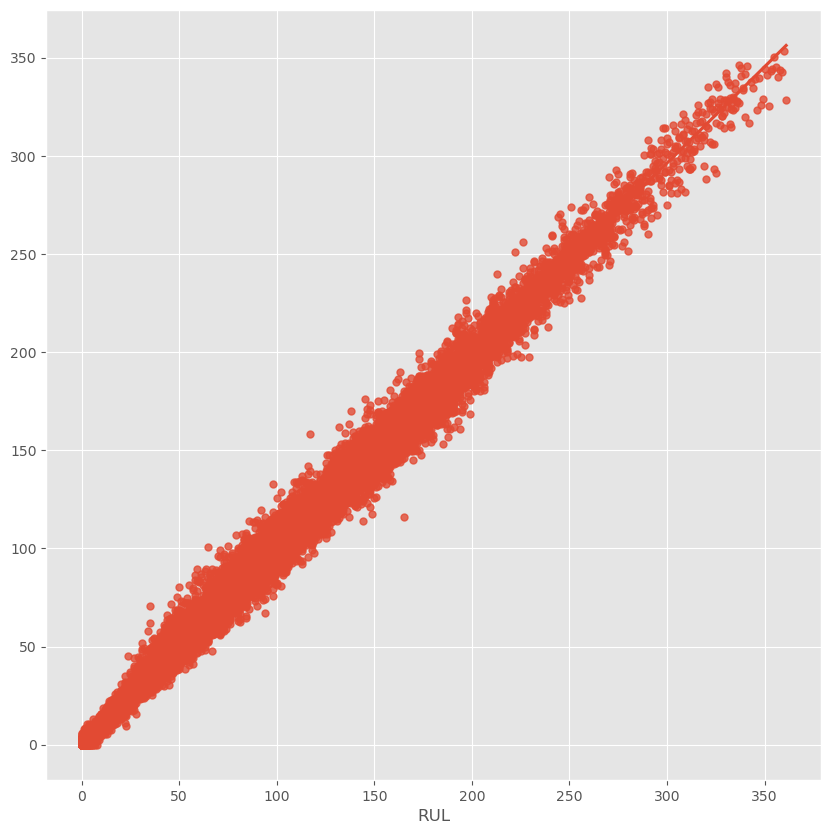

In [17]:
print(metrics.r2_score(expected_y,predicted_y))
print(metrics.mean_squared_log_error(expected_y,predicted_y))

plt.figure(figsize=(10,10))
sns.regplot(expected_y,predicted_y,fit_reg=True,scatter_kws={'s':25})

Plot here of result on the training data on a per point basis. Main observations:

- Model is only looking at the individual data points (with some impact of previous time from the running summaries)
- Different unit histories are not being considered independently
- Almost all predictions lie within +/- 25 cycles of the expected RUL

Mean error: 0.006136523000200792
Std error 6.614596831988041


Text(0.5, 0, '$RUL_{Predicted} - RUL_{Expected}$')

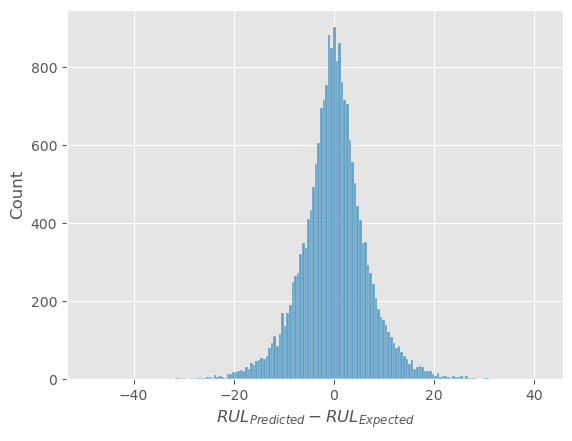

In [28]:
# distribution of expected RUL vs predicted RUL
diff = predicted_y - expected_y
print("Mean error: " + str(diff.mean()))
print("Std error " + str(diff.std()))
ax = sns.histplot(diff)
ax.set_xlabel(r"$RUL_{Predicted} - RUL_{Expected}$")

In [ ]:
""